# Git Repository Stuff

In [7]:
!git config --global user.email "ltskar009@myuct.ac.za"

In [8]:
!git add .

In [9]:
!git submodule add <url> Data Techniques/Astronomical_Techniques

The system cannot find the file specified.


In [10]:
!git commit -m "Add Jupyter Notebook"

[main 1a4e40c] Add Jupyter Notebook
 1 file changed, 29 insertions(+), 49 deletions(-)


In [11]:
!git push

To https://github.com/KaraboLetsholo/3rd-Year-Project-.git
   bcce351..1a4e40c  main -> main


In [6]:
!git commit -m "selection criteria"

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Code.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


# Importing Important Modules

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import scipy as sp
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import sigmoid_kernel
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Conv1D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras import backend
from keras.layers import Dense
from keras.models import load_model, Sequential
from sklearn.metrics import roc_curve, auc
import keras as keras
from sklearn.metrics import confusion_matrix

# tWZ-ttZ

## Importing the data
The tWZ (signal) versus the ttZ (background) datafile is named 'tWZ+ttZ (1).csv' and is imported using the pandas 'read_csv()' function. The data has features and labels and the signal process (tWZ) has a label of 1 and the background process (ttZ) has a label of 0.

In [16]:
df1.shape

In [127]:
df1 = pd.read_csv('tWZ+ttZ (1).csv')#
X1 = df1.drop(['label'], axis=1)
y1 = df1['label']

X1 = X1[['mu_pt_2', 'mu_e_2', 'mu_pt_3', 'mu_e_3', 'mu_phi_2', 'Z_eta', 'mu_eta_2', 'mu_eta_1', 'jet_eta_1', 'jet_eta_3', 'mu_pt_1', 'mu_e_1', 'jet_eta_2', 'mu_phi_1', 'el_eta_1']]
#X1 = X1.drop(['delPhi_0_lep_MET','MET','num_jets','num_bjets','num_fake_leps','jet_pt_1','jet_pt_2','jet_pt_3','jet_phi_1','jet_phi_2','jet_phi_3','jet_eta_1','jet_eta_2','jet_eta_3','jet_e_1','jet_e_2','jet_e_3','jet_DL1r_1','jet_DL1r_2','jet_DL1r_3','el_pt_1','el_pt_2','el_pt_3','el_eta_1','el_eta_2','el_eta_3','el_phi_1','el_phi_2','el_phi_3','el_e_1','el_e_2','el_e_3'], axis=1)#	mu_pt_1	mu_pt_2	mu_pt_3	mu_eta_1	mu_eta_2	mu_eta_3	mu_phi_1	mu_phi_2	mu_phi_3	mu_e_1	mu_e_2	mu_e_3	label

## Splitting the dataset into training, testing and validation dataset with split (60,20,20)

In [130]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, train_size=0.6, test_size=0.4, shuffle=True)
X1_test, X1_val, y1_test, y1_val = train_test_split(X1_test,y1_test, train_size=0.5, test_size=0.5, shuffle=True)

In [131]:
scaler1 = StandardScaler()
scaler_train1 = scaler1.fit(X1_train)
X1_train_scaled = scaler_train1.transform(X1_train)
scaler_test1 = scaler1.fit(X1_test)
X1_test_scaled = scaler_test1.transform(X1_test)
scaler_val1 = scaler1.fit(X1_val)
X1_val_scaled = scaler_test1.transform(X1_val)
#scaler_val1 = scaler1.fit(X1_val)
#X1_val = scaler1.transform(X1_val)
scaler = MinMaxScaler()
model=scaler.fit(X1_train)
X1_train_prime_scaled=model.transform(X1_train)

scaler2 = MinMaxScaler()
model2=scaler2.fit(X1_test)
X1_test_prime_scaled=model2.transform(X1_test)

## Defining the Model

In [132]:
callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.5,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

model = Sequential()
model.add(Dense(X1.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'mae'])
history1 = model.fit(X1_train_scaled, y1_train, epochs=20, validation_data=(X1_val_scaled, y1_val), callbacks=None)
model.summary()

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5291 - loss: 0.8836 - mae: 0.5032 - val_accuracy: 0.7815 - val_loss: 0.5095 - val_mae: 0.3713
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7283 - loss: 0.5364 - mae: 0.3724 - val_accuracy: 0.8030 - val_loss: 0.4578 - val_mae: 0.3305
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7553 - loss: 0.4973 - mae: 0.3435 - val_accuracy: 0.8100 - val_loss: 0.4394 - val_mae: 0.3135
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7746 - loss: 0.4752 - mae: 0.3281 - val_accuracy: 0.8115 - val_loss: 0.4313 - val_mae: 0.3051
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7789 - loss: 0.4647 - mae: 0.3200 - val_accuracy: 0.8112 - val_loss: 0.4259 - val_mae: 0.2986
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7841 - loss: 0.4592 - mae: 0.3133 - val_accuracy: 0.8108 - val_loss: 0.4250 - val_mae: 0.2987
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_91 (Dense)                     │ (32, 15)                    │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_68 (Dropout)                 │ (32, 15)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_92 (Dense)                     │ (32, 1)                     │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 770 (3.01 KB)

 Trainable params: 256 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 514 (2.01 KB)

In [133]:
y_pred1 = model.predict(X1_test_scaled)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [189]:
signal, bg0 = [],[]
j = 0
for index in y1_test.index:
    if y1_test[index] == 0:
        bg0.append(float(y_pred1[j][0]))
    else:
        signal.append(float(y_pred1[j][0]))
    j+=1

tWZ = np.array(signal)
ttZ1 = np.array(bg0)
#print(np.transpose(np.array(signal), axes=0))
#tWZ_ttZ = pd.DataFrame([np.array(signal),np.array(bg0)], columns=['tWZ','ttZ']
#tWZ_ttZ = [tWZ, ttZ1]

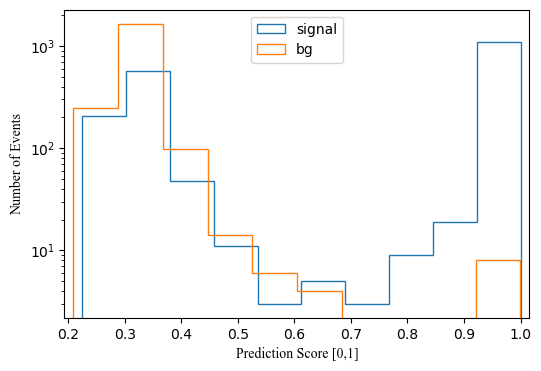

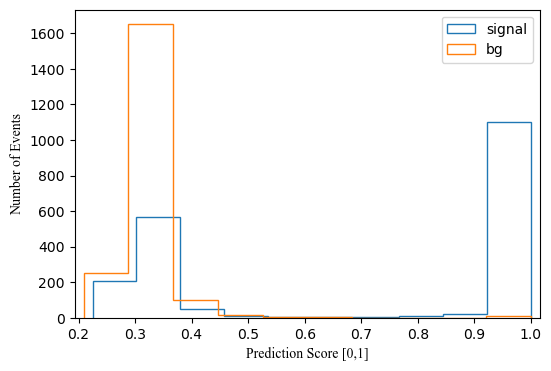

In [135]:
fig, ax1 = plt.subplots(1, figsize=(6,4))

plt.hist(signal, histtype='step', label='signal')
plt.hist(bg0, histtype='step', label='bg')
plt.yscale('log')
plt.legend()
plt.margins(x=0.02, y=None, tight=True)
plt.xlabel('Prediction Score [0,1]', font='Times New Roman')
plt.ylabel('Number of Events', font='Times New Roman')
plt.savefig('tWZ-ttZ-log')
plt.show()

fig, ax1 = plt.subplots(1, figsize=(6,4))


plt.hist(signal, histtype='step', label='signal')
plt.hist(bg0, histtype='step', label='bg')
plt.yscale('linear')
plt.legend()
plt.xlabel('Prediction Score [0,1]', font='Times New Roman')
plt.ylabel('Number of Events', font='Times New Roman')
plt.margins(x=0.02, y=None, tight=True)
plt.savefig('tWZ-ttZ')

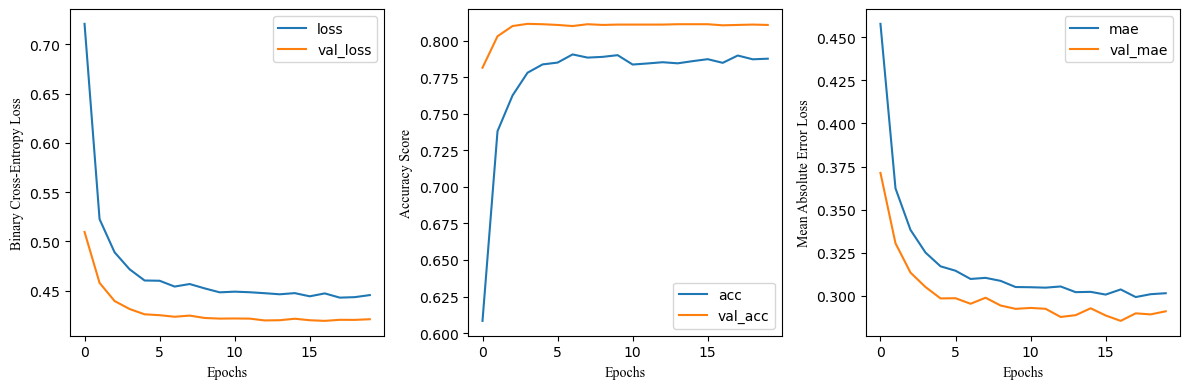

In [136]:
params1 = pd.DataFrame(history1.history)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.plot(params1['loss'], label='loss')
ax1.plot(params1['val_loss'] , label='val_loss')
ax1.legend()
ax2.plot(params1['accuracy'], label='acc')
ax2.plot(params1['val_accuracy'], label='val_acc')
ax2.legend()
ax3.plot(params1['mae'], label='mae')
ax3.plot(params1['val_mae'], label='val_mae')
ax3.legend()
ax2.set_xlabel("Epochs", font='Times New Roman')
ax3.set_xlabel("Epochs", font='Times New Roman')
ax1.set_xlabel("Epochs", font='Times New Roman')
ax1.set_ylabel("Binary Cross-Entropy Loss", font='Times New Roman')
ax2.set_ylabel("Accuracy Score", font='Times New Roman')
ax3.set_ylabel("Mean Absolute Error Loss", font='Times New Roman')
fig.tight_layout() 
plt.savefig("tWZ-ttZ-acc")

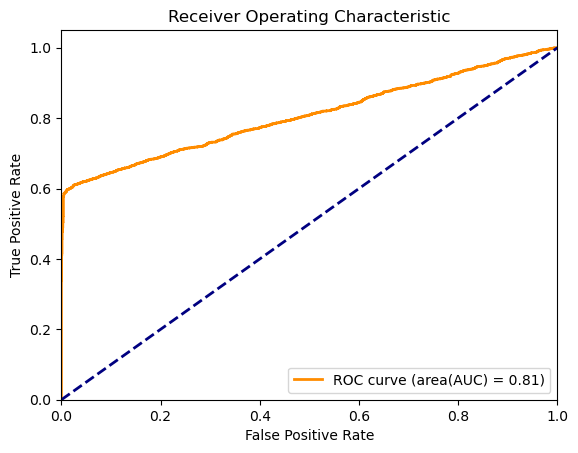

0.8076357878392415


In [109]:
fpr, tpr, _ = roc_curve(y1_test, y_pred1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area(AUC) = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC-AUC-Curves')
plt.show()
print(roc_auc)

# ttZ-vs-Background Classification

## Importing the data
The tWZ (signal) versus the ttZ (background) datafile is named 'tWZ+ttZ (1).csv' and is imported using the pandas 'read_csv()' function. The data has features and labels and the signal process (tWZ) has a label of 1 and the background process (ttZ) has a label of 0.

In [110]:
df2 = pd.read_csv('ttZ+bkg.csv')#
X2 = df2.drop(['label'], axis=1)
y2 = df2['label']
X2 = X2[['el_pt_2', 'el_e_2', 'el_eta_2', 'el_phi_2', 'el_eta_1', 'el_pt_1', 'el_e_1', 'el_phi_1', 'el_pt_3', 'el_e_3', 'jet_eta_2', 'jet_eta_1', 'Z_eta', 'jet_eta_3', 'el_eta_3']]
#X2[['el_pt_2', 'el_e_2', 'el_eta_2', 'el_phi_2', 'el_eta_1', 'el_pt_1', 'el_e_1', 'el_phi_1', 'el_pt_3', 'el_e_3', 'jet_eta_2', 'jet_eta_1', 'Z_eta', 'jet_eta_3', 'el_eta_3']]
#X2[['el_pt_2', 'el_e_2', 'el_eta_2', 'el_phi_2', 'el_eta_1', 'el_pt_1', 'el_e_1', 'el_phi_1', 'el_pt_3', 'el_e_3']]
#X2[['jet_DL1r_1','jet_DL1r_2','delPhi_0_lep_MET','el_phi_3','el_eta_2','jet_eta_2','Z_phi','Z_eta','jet_eta_1','el_phi_1']]
#X2 = X2.drop(['delPhi_0_lep_MET','MET','num_jets','num_bjets','jet_pt_1','jet_pt_2','jet_pt_3','jet_phi_1','jet_phi_2','jet_phi_3','jet_eta_1','jet_eta_2','jet_eta_3','jet_e_1','jet_e_2','jet_e_3','jet_DL1r_1','jet_DL1r_2','jet_DL1r_3','el_pt_1','el_pt_2','el_pt_3','el_eta_1','el_eta_2','el_eta_3','el_phi_1','el_phi_2','el_phi_3','el_e_1','el_e_2','el_e_3'], axis=1)#,'mu_pt_1',mu_pt_2	mu_pt_3	mu_eta_1	mu_eta_2	mu_eta_3	mu_phi_1	mu_phi_2	mu_phi_3	mu_e_1	mu_e_2	mu_e_3	label

## Splitting the dataset into training, testing and validation dataset with split (60,20,20)

In [112]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, train_size=0.6, test_size=0.4, shuffle=True)
X2_test, X2_val, y2_test, y2_val = train_test_split(X2_test,y2_test, train_size=0.5, test_size=0.5, shuffle=True)

In [119]:
scaler2 = StandardScaler()
scaler_train2 = scaler2.fit(X2_train)
X2_train_scaled = scaler_train2.transform(X2_train)
scaler_test2 = scaler2.fit(X2_test)
X2_test_scaled = scaler_test2.transform(X2_test)
scaler_val2 = scaler2.fit(X2_val)
X2_val_scaled = scaler_test2.transform(X2_val)
#scaler_val1 = scaler1.fit(X1_val)
#X1_val = scaler1.transform(X1_val)
scaler = MinMaxScaler()
model=scaler.fit(X2_train)
X2_train_prime_scaled=model.transform(X2_train)

scaler2 = MinMaxScaler()
model2=scaler2.fit(X2_test)
X2_test_prime_scaled=model2.transform(X2_test)

## Defining the Model

In [120]:
callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.5,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

model = Sequential()
model.add(Dense(X2.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(X2.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(X2.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(X2.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'mae'])
history2 = model.fit(X2_train_scaled, y2_train, epochs=20, validation_data=(X2_val_scaled, y2_val), callbacks=None)
model.summary()

Epoch 1/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6138 - loss: 0.6463 - mae: 0.4614 - val_accuracy: 0.7783 - val_loss: 0.4544 - val_mae: 0.3050
Epoch 2/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7797 - loss: 0.4686 - mae: 0.3165 - val_accuracy: 0.7903 - val_loss: 0.4330 - val_mae: 0.2933
Epoch 3/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7913 - loss: 0.4482 - mae: 0.3004 - val_accuracy: 0.7948 - val_loss: 0.4287 - val_mae: 0.2853
Epoch 4/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8000 - loss: 0.4322 - mae: 0.2878 - val_accuracy: 0.7973 - val_loss: 0.4267 - val_mae: 0.2822
Epoch 5/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7945 - loss: 0.4310 - mae: 0.2868 - val_accuracy: 0.7961 - val_loss: 0.4254 - val_mae: 0.2828
Epoch 6/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8015 - loss: 0.4222 - mae: 0.2844 - val_accuracy: 0.7978 - val_loss: 0.4245 - val_mae: 0.2805
Epoch 7/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_86 (Dense)                     │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_64 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_65 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_66 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_67 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,930 (11.45 KB)

 Trainable params: 976 (3.81 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,954 (7.64 KB)

In [121]:
y_pred2 = model.predict(X2_test_scaled)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [188]:
bg1, bg2 = [],[]
j = 0
for index in y2_test.index:
    if y2_test[index] == 0:
        bg2.append(float(y_pred2[j][0]))
    else:
        bg1.append(float(y_pred2[j][0]))
    j+=1

ttZ2 =  np.array(bg1)
WZ = np.array(bg2)
ttZ_bg = [ttZ2, WZ]

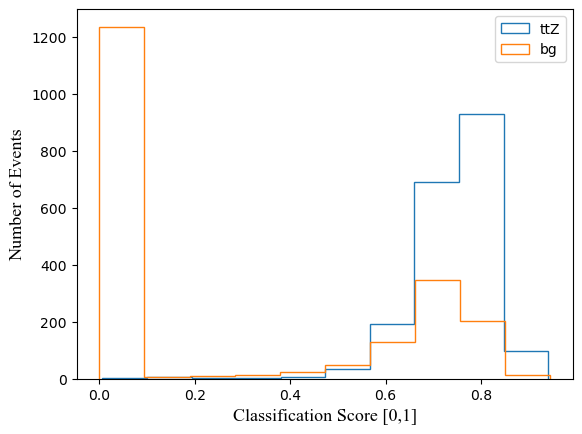

In [123]:
plt.hist(bg1, histtype='step', label='ttZ')
plt.hist(bg2, histtype='step', label='bg')
plt.ylabel("Number of Events", font='Times New Roman', fontsize=13)
plt.xlabel("Classification Score [0,1]", font='Times New Roman', fontsize=13)
#plt.yscale('log')
plt.legend()
plt.savefig('ttZ')

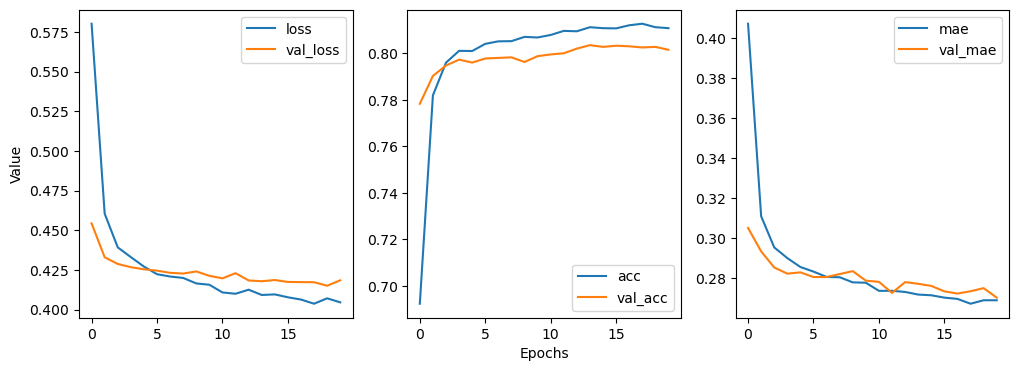

In [124]:
params2 = pd.DataFrame(history2.history)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.plot(params2['loss'], label='loss')
ax1.plot(params2['val_loss'], label='val_loss')
ax1.legend()
ax2.plot(params2['accuracy'], label='acc')
ax2.plot(params2['val_accuracy'], label='val_acc')
ax2.legend()
ax3.plot(params2['mae'], label='mae')
ax3.plot(params2['val_mae'], label='val_mae')
ax3.legend()
ax2.set_xlabel("Epochs")
ax1.set_ylabel("Value")
plt.savefig('ttZ-loss')

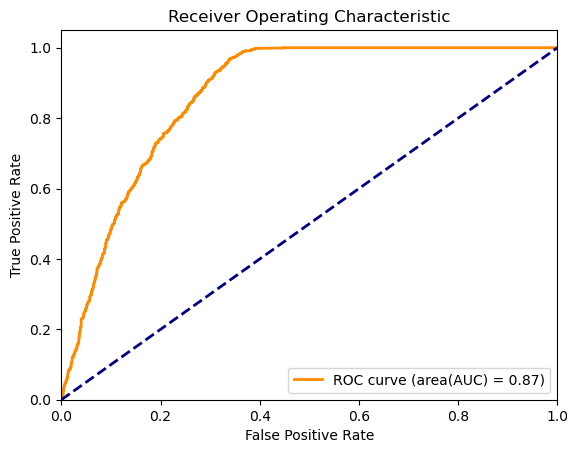

0.8663478032557326


In [125]:
fpr, tpr, _ = roc_curve(y2_test, y_pred2)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area(AUC) = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC-AUC-Curves-ttZ')
plt.show()
print(roc_auc)

# tWZ -vs- All Background

## Importing the data
The tWZ (signal) versus the ttZ (background) datafile is named 'tWZ+ttZ (1).csv' and is imported using the pandas 'read_csv()' function. The data has features and labels and the signal process (tWZ) has a label of 1 and the background process (ttZ) has a label of 0.

In [260]:
df0, df_ = pd.read_csv('ttZ+bkg.csv'), pd.read_csv('tWZ+ttZ (1).csv')#
df = pd.concat([df0, df_])
df = df.dropna()
#df = df.drop(['num_fake_leps','delPhi_0_lep_MET','MET','num_jets','num_bjets','jet_pt_1','jet_pt_2','jet_pt_3','jet_phi_1','jet_phi_2','jet_phi_3','jet_eta_1','jet_eta_2','jet_eta_3','jet_e_1','jet_e_2','jet_e_3','jet_DL1r_1','jet_DL1r_2','jet_DL1r_3','el_pt_1','el_pt_2','el_pt_3','el_eta_1','el_eta_2','el_eta_3','el_phi_1','el_phi_2','el_phi_3','el_e_1','el_e_2','el_e_3'], axis=1)#,'mu_pt_1',mu_pt_2	mu_pt_3	mu_eta_1	mu_eta_2	mu_eta_3	mu_phi_1	mu_phi_2	mu_phi_3	mu_e_1	mu_e_2	mu_e_3	label
X = df.drop(['label'], axis=1)
y = df['label']

X = X[['mu_pt_2', 'mu_e_2', 'mu_pt_3', 'mu_e_3', 'mu_phi_2', 'Z_eta', 'mu_eta_2', 'mu_eta_1', 'jet_eta_1', 'jet_eta_3', 'mu_pt_1', 'mu_e_1', 'jet_eta_2', 'mu_phi_1', 'el_eta_1']]

## Splitting the dataset into training, testing and validation dataset with split (60,20,20)

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75, test_size=0.25, shuffle=True)
#X_test, X_val, y_test, y_val = train_test_split(X_test,y_test, train_size=0.5, test_size=0.5, shuffle=True)

In [262]:
"""scaler = StandardScaler()
scaler_train = scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler_test = scaler.fit(X_test)
X_test = scaler.transform(X_test)
scaler_val = scaler2.fit(X_val)
X_val = scaler.transform(X_val)"""

scaler = StandardScaler()
scaler_train = scaler.fit(X_train)
X_train_scaled = scaler_train.transform(X_train)
scaler_test = scaler.fit(X_test)
X_test_scaled = scaler_test.transform(X_test)
#scaler_val = scaler.fit(X_val)
#X_val_scaled = scaler_test.transform(X_val)
#scaler_val1 = scaler1.fit(X1_val)
#X1_val = scaler1.transform(X1_val)
scaler = MinMaxScaler()
model=scaler.fit(X_train)
X_train_prime_scaled=model.transform(X_train)

scaler = MinMaxScaler()
model=scaler.fit(X_test)
X_test_prime_scaled=model.transform(X_test)

## Defining the Model

In [263]:
"""callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

model0 = Sequential()
model0.add(Dense(30, activation='relu'))
model0.add(Dense(40, activation='relu'))
model0.add(Dense(10, activation='relu'))
model0.add(Dense(1, activation='sigmoid'))
model0.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'mae'])"""
model = Sequential()
model.add(Dense(X.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(X.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(X.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(X.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'mae'])
history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_test_scaled, y_test), callbacks=None)
model.summary()

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.6842 - loss: 0.5743 - mae: 0.4103 - val_accuracy: 0.7928 - val_loss: 0.4438 - val_mae: 0.2993
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7916 - loss: 0.4484 - mae: 0.3036 - val_accuracy: 0.7948 - val_loss: 0.4409 - val_mae: 0.2967
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7988 - loss: 0.4350 - mae: 0.2928 - val_accuracy: 0.7950 - val_loss: 0.4380 - val_mae: 0.2932
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8020 - loss: 0.4272 - mae: 0.2885 - val_accuracy: 0.7942 - val_loss: 0.4375 - val_mae: 0.2909
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8019 - loss: 0.4257 - mae: 0.2876 - val_accuracy: 0.7948 - val_loss: 0.4370 - val_mae: 0.2944
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8011 - loss: 0.4286 - mae: 0.2885 - val_accuracy: 0.7958 - val_loss: 0.4359 - val_mae: 0.2909
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_111 (Dense)                    │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_80 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_112 (Dense)                    │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_81 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_113 (Dense)                    │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_82 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_114 (Dense)                    │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_83 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_115 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,930 (11.45 KB)

 Trainable params: 976 (3.81 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,954 (7.64 KB)

In [264]:
y_pred = model.predict(X_test_scaled)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [265]:
signal, bg = [],[]
j = 0
for index in y_test.index:
    if y_test[index] == 0:
        bg.append(float(y_pred[j][0]))
    else:
        signal.append(float(y_pred[j][0]))
    j+=1

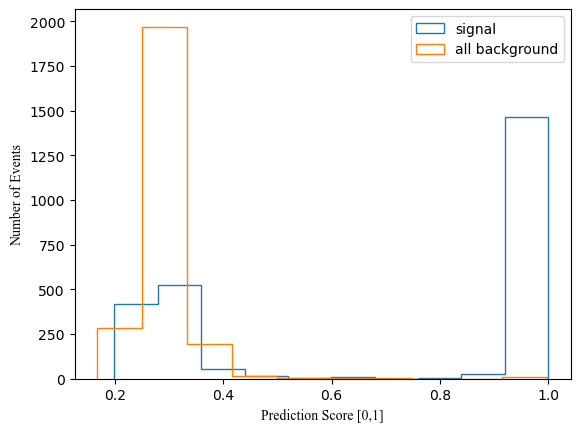

In [266]:
plt.hist(signal, histtype='step', label='signal')
plt.hist(bg, histtype='step', label='all background')
plt.yscale('linear')
plt.xlabel('Prediction Score [0,1]', font='Times New Roman')
plt.ylabel('Number of Events', font='Times New Roman')
plt.savefig('tWZ-All_bg')
plt.legend()

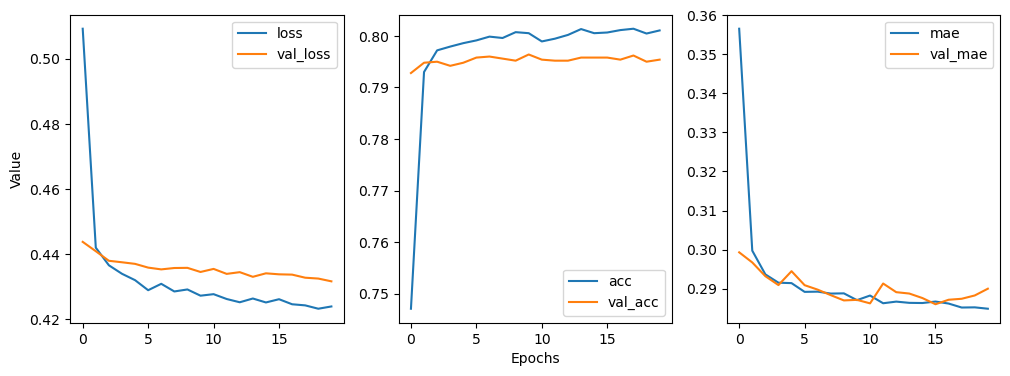

In [267]:
params = pd.DataFrame(history.history)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.plot(params['loss'], label='loss')
ax1.plot(params['val_loss'], label='val_loss')
ax1.legend()
ax2.plot(params['accuracy'], label='acc')
ax2.plot(params['val_accuracy'], label='val_acc')
ax2.legend()
ax3.plot(params['mae'], label='mae')
ax3.plot(params['val_mae'], label='val_mae')
ax3.legend()
ax2.set_xlabel("Epochs")
ax1.set_ylabel("Value")
plt.savefig("tWZ_All_bg_acc")

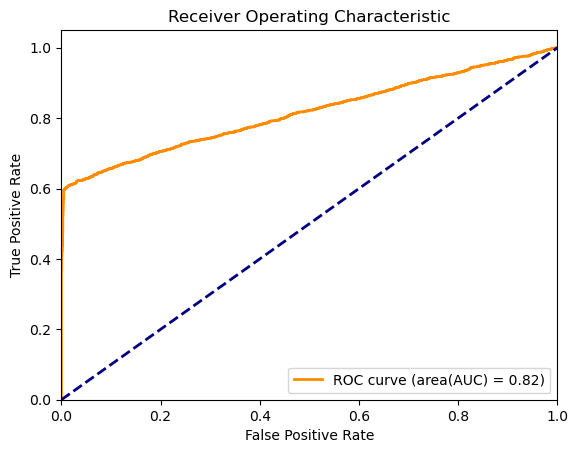

0.8154691968910881


In [268]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area(AUC) = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC-AUC-Curves-tWZ_bg')
plt.show()
print(roc_auc)

# Selection Criteria for tWZ-ttZ

In [11]:
data = pd.read_csv('tWZ+ttZ (1).csv')
signal = data[data['label'] == 1]
bg = data[data['label'] == 0]

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

# Assuming df is your DataFrame with 49 features and 'label' as the binary target
df = data
features = df.columns[:-1]
label = df['label']

"""
# Step 1: Analyze Distributions
for feature in features:
    plt.figure(figsize=(10, 4))
    df[df['label'] == 0][feature].hist(alpha=0.5, label='0')
    df[df['label'] == 1][feature].hist(alpha=0.5, label='1')
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()"""

# Step 2: Calculate Binary Cross Entropy
bce_scores = {}
for feature in features:
    bce = log_loss(label, df[feature])
    bce_scores[feature] = bce

# Step 3: Feature Selection
selected_features = sorted(bce_scores, key=bce_scores.get)[:15]
print("Selected Features:", selected_features)


Selected Features: ['mu_pt_2', 'mu_e_2', 'mu_pt_3', 'mu_e_3', 'mu_phi_2', 'Z_eta', 'mu_eta_2', 'mu_eta_1', 'jet_eta_1', 'jet_eta_3', 'mu_pt_1', 'mu_e_1', 'jet_eta_2', 'mu_phi_1', 'el_eta_1']


In [13]:
bce_scores

{'Unnamed: 0': 18.021826694558573,
 'Z_pt': 18.021826694558573,
 'Z_mass': 18.021826694558573,
 'Z_phi': 15.282329772025667,
 'Z_eta': 12.636124031759929,
 'delPhi_0_lep_MET': 16.28332218304476,
 'MET': 18.016639797830052,
 'num_jets': 18.021826694558573,
 'num_bjets': 18.021826694558573,
 'num_fake_leps': 18.02362887722803,
 'jet_pt_1': 18.021826694558573,
 'jet_pt_2': 18.021826694558573,
 'jet_pt_3': 18.021826694558573,
 'jet_phi_1': 15.28195203896979,
 'jet_phi_2': 15.421111906355232,
 'jet_phi_3': 15.30668013682832,
 'jet_eta_1': 13.111225028306668,
 'jet_eta_2': 13.455836983103993,
 'jet_eta_3': 13.3256071036845,
 'jet_e_1': 18.021826694558573,
 'jet_e_2': 18.021826694558573,
 'jet_e_3': 18.021826694558573,
 'jet_DL1r_1': 17.072242104169536,
 'jet_DL1r_2': 17.351186175108722,
 'jet_DL1r_3': 17.682035812429937,
 'el_pt_1': 23.66626281529432,
 'el_pt_2': 28.755626673837657,
 'el_pt_3': 22.684073260440876,
 'el_eta_1': 14.613048674193957,
 'el_eta_2': 17.525863172617367,
 'el_eta_3':

In [14]:
df_bce_scores = pd.DataFrame(list(bce_scores.items()), columns=['Feature', 'BCE_Score'])

print(df_bce_scores)

             Feature  BCE_Score
0         Unnamed: 0  18.021827
1               Z_pt  18.021827
2             Z_mass  18.021827
3              Z_phi  15.282330
4              Z_eta  12.636124
5   delPhi_0_lep_MET  16.283322
6                MET  18.016640
7           num_jets  18.021827
8          num_bjets  18.021827
9      num_fake_leps  18.023629
10          jet_pt_1  18.021827
11          jet_pt_2  18.021827
12          jet_pt_3  18.021827
13         jet_phi_1  15.281952
14         jet_phi_2  15.421112
15         jet_phi_3  15.306680
16         jet_eta_1  13.111225
17         jet_eta_2  13.455837
18         jet_eta_3  13.325607
19           jet_e_1  18.021827
20           jet_e_2  18.021827
21           jet_e_3  18.021827
22        jet_DL1r_1  17.072242
23        jet_DL1r_2  17.351186
24        jet_DL1r_3  17.682036
25           el_pt_1  23.666263
26           el_pt_2  28.755627
27           el_pt_3  22.684073
28          el_eta_1  14.613049
29          el_eta_2  17.525863
30      

In [15]:
df_bce_scores.to_csv('bce_scores_tWZ.csv', index=False)

# Selection Criteria for ttZ-Bg

In [145]:
data = pd.read_csv('ttz+bkg.csv')
signal = data[data['label'] == 1]
bg = data[data['label'] == 0]

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

# Assuming df is your DataFrame with 49 features and 'label' as the binary target
df = data
features = df.columns[:-1]
label = df['label']

"""
# Step 1: Analyze Distributions
for feature in features:
    plt.figure(figsize=(10, 4))
    df[df['label'] == 0][feature].hist(alpha=0.5, label='0')
    df[df['label'] == 1][feature].hist(alpha=0.5, label='1')
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()"""

# Step 2: Calculate Binary Cross Entropy
bce_scores = {}
for feature in features:
    bce = log_loss(label, df[feature])
    bce_scores[feature] = bce

# Step 3: Feature Selection
selected_features = sorted(bce_scores, key=bce_scores.get)[:15]
print("Selected Features:", selected_features)


Selected Features: ['el_pt_2', 'el_e_2', 'el_eta_2', 'el_phi_2', 'el_eta_1', 'el_pt_1', 'el_e_1', 'el_phi_1', 'el_pt_3', 'el_e_3', 'jet_eta_2', 'jet_eta_1', 'Z_eta', 'jet_eta_3', 'el_eta_3']


In [147]:
df_bce_scores = pd.DataFrame(list(bce_scores.items()), columns=['Feature', 'BCE_Score'])

In [148]:
df_bce_scores

,Feature,BCE_Score
0,Unnamed: 0,18.020025
1,Z_pt,18.023629
2,Z_mass,18.023629
3,Z_phi,15.300780
4,Z_eta,14.103781
5,delPhi_0_lep_MET,15.069604
6,MET,18.011456
7,num_jets,18.023629
8,num_bjets,18.023629
9,jet_pt_1,18.023629


In [23]:
df_bce_scores.to_csv('bce_scores_ttZ.csv', index=False)

# tWZ versus All Background

In [149]:
data1 = pd.read_csv('tWZ+ttZ (1).csv')
data2 = pd.read_csv('ttz+bkg.csv')
data = pd.concat([data1, data2])
data = data.dropna()
signal = data[data['label'] == 1]
bg = data[data['label'] == 0]
signal = data[data['label'] == 1]
bg = data[data['label'] == 0]
signal.shape

(10000, 50)

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

# Assuming df is your DataFrame with 49 features and 'label' as the binary target
df = data
features = df.columns[:-1]
label = df['label']

"""
# Step 1: Analyze Distributions
for feature in features:
    plt.figure(figsize=(10, 4))
    df[df['label'] == 0][feature].hist(alpha=0.5, label='0')
    df[df['label'] == 1][feature].hist(alpha=0.5, label='1')
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()"""

# Step 2: Calculate Binary Cross Entropy
bce_scores = {}
for feature in features:
    bce = log_loss(label, df[feature])
    bce_scores[feature] = bce

# Step 3: Feature Selection
selected_features = sorted(bce_scores, key=bce_scores.get)[:15]
print("Selected Features:", selected_features)

Selected Features: ['mu_pt_2', 'mu_e_2', 'mu_pt_3', 'mu_e_3', 'mu_phi_2', 'Z_eta', 'mu_eta_2', 'mu_eta_1', 'jet_eta_1', 'jet_eta_3', 'mu_pt_1', 'mu_e_1', 'jet_eta_2', 'mu_phi_1', 'el_eta_1']


In [152]:
df_bce_scores = pd.DataFrame(list(bce_scores.items()), columns=['Feature', 'BCE_Score'])
df_bce_scores

,Feature,BCE_Score
0,Unnamed: 0,18.021827
1,Z_pt,18.021827
2,Z_mass,18.021827
3,Z_phi,15.282330
4,Z_eta,12.636124
5,delPhi_0_lep_MET,16.283322
6,MET,18.016640
7,num_jets,18.021827
8,num_bjets,18.021827
9,num_fake_leps,18.023629


In [34]:
df_bce_scores.to_csv('bce_scores_tWZ_all_bg.csv', index=False)

# Scatter Plots

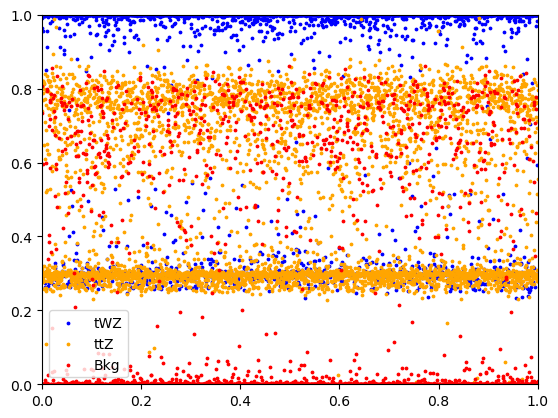

In [297]:
plt.xlim([0,1])
plt.ylim([0,1])
plt.scatter(np.linspace(0,1,len(signal)), signal, color='blue', s=3, label='tWZ')
plt.scatter(np.linspace(0,1,len(bg0)), bg0, color='orange', s=3, label='ttZ')
plt.scatter(np.linspace(0,1,len(bg1)), bg1, color='orange', s=3)
plt.scatter(np.linspace(0,1,len(bg2)), bg2, color='red', s=3, label='Bkg')
plt.legend(loc='best')

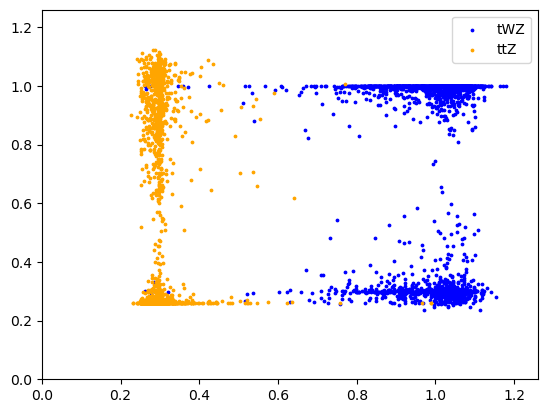

In [324]:
mk_bg2, mk_bg1 = bg2 + 0.26*np.ones(len(bg2)), bg1 + 0.26*np.ones(len(bg1))
plt.xlim([0.,1+0.26])
plt.ylim([0.,1+0.26])
plt.scatter(mk_bg1, signal[:2034], color='blue', s=3, label='tWZ')
plt.scatter(bg0[:1966], mk_bg2, color='orange', s=3, label='ttZ')
#plt.scatter(np.linspace(0,1,len(bg1)), bg1, color='orange', s=3)
#plt.scatter(np.linspace(0,1,len(bg2)), bg2, color='red', s=3, label='Bkg')
plt.legend(loc='best')

In [307]:
len(bg2)

1966

# Decision Boundaries

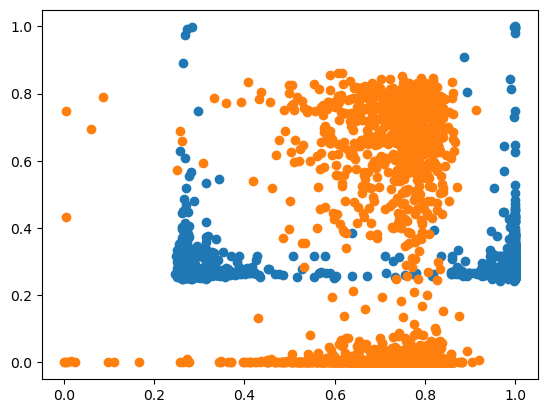

In [114]:
plt.scatter(tWZ[:2490], ttZ1)
plt.scatter(ttZ2[:1966], bg2)

In [204]:
len(ttZ2)

1970

Text(0, 0.5, 'ttZ-Bkg Process Discrimination Score [0,1]')

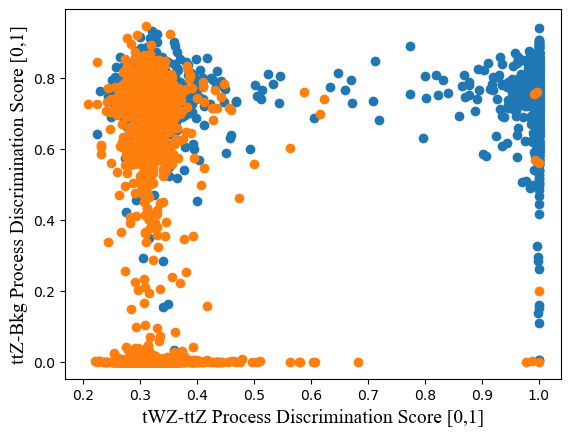

In [201]:
plt.scatter(tWZ[:1970], ttZ2)
plt.scatter(ttZ1,WZ[:2029])
plt.xlabel('tWZ-ttZ Process Discrimination Score [0,1]', font='Times New Roman', fontsize=14)
plt.ylabel('ttZ-Bkg Process Discrimination Score [0,1]', font='Times New Roman', fontsize=14)


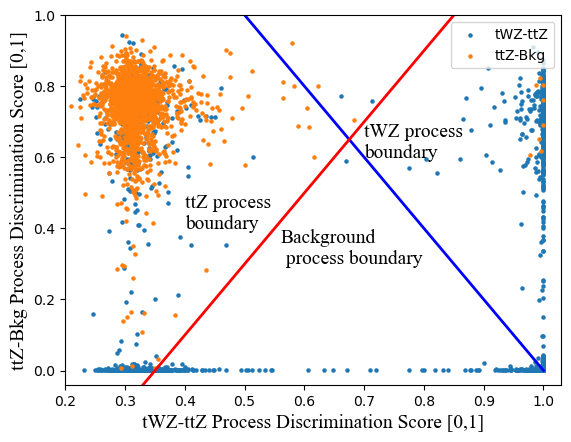

In [248]:
x = np.linspace(0,1,len(np.concatenate([ttZ2, bg2])))
y = -2*x + 2
y2 = 2*x - 0.7

plt.ylim([-0.04,1])
plt.xlim([0.2,1.03])

plt.scatter(tWZ, WZ[:1971], label='tWZ-ttZ', s=5)
plt.scatter(ttZ1[:1970],ttZ2, label='ttZ-Bkg', s=5)
plt.plot(x, y, linewidth=2, color='blue')
plt.plot(x, y2, linewidth=2, color='red')
plt.xlabel('tWZ-ttZ Process Discrimination Score [0,1]', font='Times New Roman', fontsize=14)
plt.ylabel('ttZ-Bkg Process Discrimination Score [0,1]', font='Times New Roman', fontsize=14)
plt.text(0.56, 0.3, "Background\n process boundary", font='Times New Roman', fontsize=14 )
plt.text(0.7, 0.6, "tWZ process \nboundary", font='Times New Roman', fontsize=14 )
plt.text(0.4, 0.4, "ttZ process \nboundary" , font='Times New Roman', fontsize=14 )
plt.legend()
plt.savefig('scatter')
#len(ttZ1)

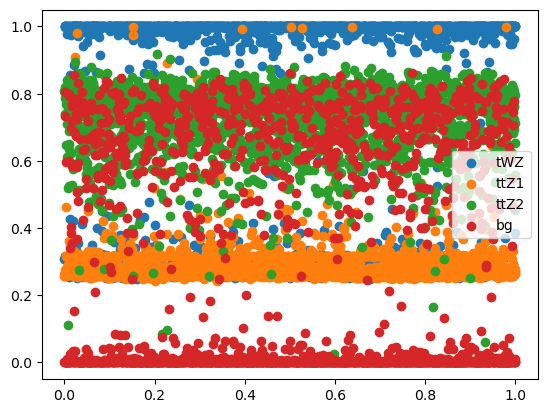

In [111]:
plt.scatter(np.linspace(0,1,len(tWZ)), tWZ, label='tWZ')
plt.scatter(np.linspace(0,1,len(ttZ1)), ttZ1, label='ttZ1')
plt.scatter(np.linspace(0,1,len(ttZ2)), ttZ2, label='ttZ1')
plt.scatter(np.linspace(0,1,len(bg2)), bg2, label='bg')
plt.legend()

In [66]:
arr = np.concatenate([ttZ1, np.ones(len(ttZ2))-ttZ2])

In [67]:
print(arr)

[0.32124823 0.34101841 0.36563611 ... 0.28645396 0.20388281 0.44335234]


In [75]:
print(tWZ_ttZ)#, ttZ_bg)

[array([0.44920754, 0.37558538, 0.89897823, ..., 0.89897823, 0.89897823,
       0.89897823]), array([0.32124823, 0.34101841, 0.36563611, ..., 0.38765785, 0.35208446,
       0.37395868])]


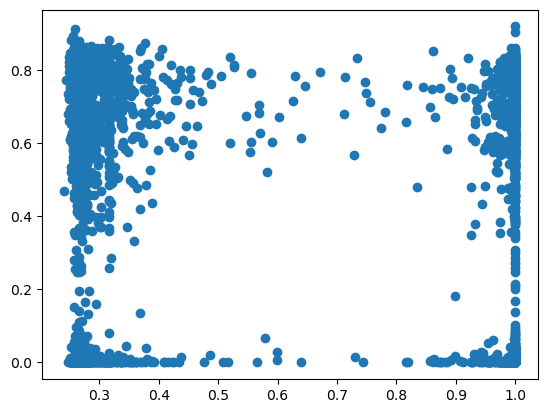

In [112]:
plt.scatter(np.concatenate([tWZ, ttZ1])[:4000], np.concatenate([bg2, ttZ2]))

In [103]:
np.concatenate([ttZ2, bg2]).shape

(4000,)

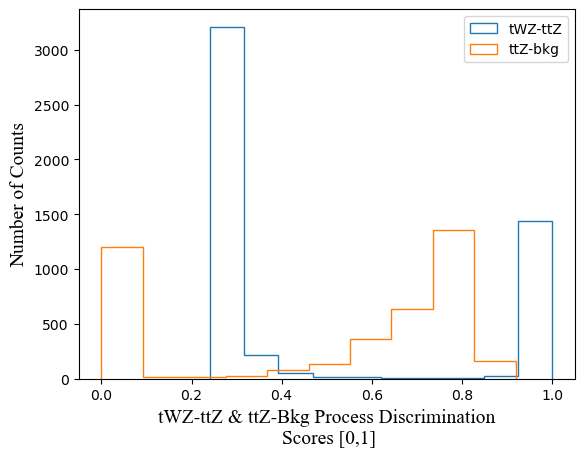

In [261]:
plt.hist(np.concatenate([tWZ, ttZ1]), histtype='step', label='tWZ-ttZ')
plt.hist(np.concatenate([ttZ2, bg2]), histtype='step', label='ttZ-bkg')
plt.xlabel('tWZ-ttZ & ttZ-Bkg Process Discrimination\n Scores [0,1]', font='Times New Roman', fontsize=14)
plt.ylabel('Number of Counts', font='Times New Roman', fontsize=14)
plt.legend()
plt.yscale('linear')

In [127]:
X1

,mu_pt_2,mu_e_2,mu_pt_3,mu_e_3,mu_phi_2,Z_eta,mu_eta_2,mu_eta_1,jet_eta_1,jet_eta_3,mu_pt_1,mu_e_1,jet_eta_2,mu_phi_1,el_eta_1
0,44048.851562,55003.199219,0.000000,0.000000,2.071930,1.240008,0.691390,0.358403,1.133338,0.642712,52577.167969,55990.417969,1.576742,-1.744072,1.034728
1,41634.457031,82673.531250,33722.402344,155786.015625,-0.139174,1.578600,1.308661,0.503426,-0.628339,-0.827996,55576.285156,62768.925781,-1.011553,1.929119,0.000000
2,53721.832031,62011.742188,23822.832031,29344.511719,0.926458,-0.852692,-0.548629,-0.580713,-0.524233,0.121575,104949.664062,123148.562500,1.530694,-1.386103,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.217137,0.000000,0.287846,-1.332720,-2.438671,131716.187500,137210.718750,-1.449999,0.229179,-0.469853
4,37126.628906,37989.230469,30890.306641,37141.644531,0.077616,3.073823,0.215131,1.893478,-1.793358,-2.247163,44343.375000,150611.765625,0.163155,2.516434,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.000000,0.000000,0.000000,0.000000,0.000000,0.290701,0.000000,0.000000,2.402550,0.215056,0.000000,0.000000,0.464357,0.000000,-0.139733
19996,0.000000,0.000000,0.000000,0.000000,0.000000,-1.996262,0.000000,-0.504140,1.120722,-0.865651,76621.695312,86566.695312,-0.818145,-1.324509,-1.152314
19997,0.000000,0.000000,0.000000,0.000000,0.000000,-0.332594,0.000000,0.000000,-1.050463,0.958368,0.000000,0.000000,0.666935,0.000000,0.198398
19998,0.000000,0.000000,0.000000,0.000000,0.000000,-0.811030,0.000000,-1.864806,-0.581909,0.513364,123214.000000,407198.375000,-0.486505,2.644801,-0.987253


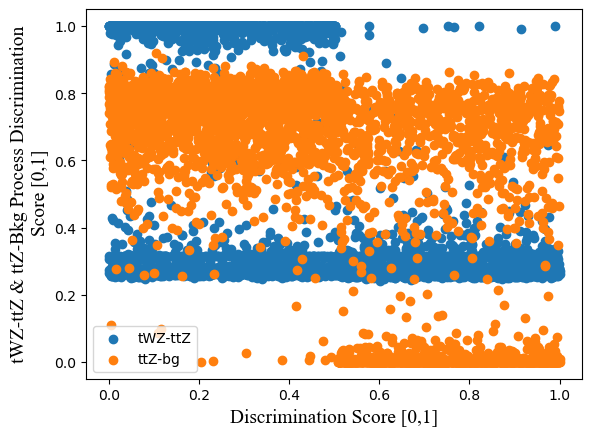

In [153]:
plt.scatter(np.linspace(0,1,len(np.concatenate([tWZ, ttZ1]))), np.concatenate([tWZ, ttZ1]), label='tWZ-ttZ')
plt.scatter(np.linspace(0,1,len(np.concatenate([ttZ2, bg2]))), np.concatenate([ttZ2, bg2]), label='ttZ-bg')
plt.ylabel('tWZ-ttZ & ttZ-Bkg Process Discrimination\n Score [0,1]', font='Times New Roman', fontsize=14)
plt.xlabel('Discrimination Score [0,1]', font='Times New Roman', fontsize=14)
plt.legend()
#len(ttZ1)

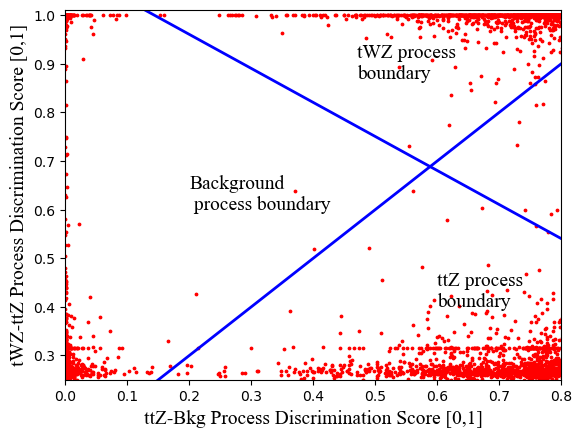

In [258]:
x = np.linspace(0,1,len(np.concatenate([ttZ2, bg2])))
y = -0.7*x + 1.1
y2 = 1*x + 0.1

plt.xlim([0,.8])
plt.ylim([0.25,1.01])

plt.scatter(np.concatenate([ttZ2, bg2]), np.concatenate([tWZ, ttZ1])[:4000], label='tWZ-ttZ', color='red', s=3)
#plt.scatter(np.linspace(0,1,len(np.concatenate([ttZ2, bg2]))), np.concatenate([ttZ2, bg2]), label='ttZ-bg')
plt.ylabel('tWZ-ttZ Process Discrimination Score [0,1]', font='Times New Roman', fontsize=14)
plt.xlabel('ttZ-Bkg Process Discrimination Score [0,1]', font='Times New Roman', fontsize=14)
plt.text(0.6, 0.4, "ttZ process \nboundary", font='Times New Roman', fontsize=14 )
plt.text(0.47, 0.87, "tWZ process \nboundary", font='Times New Roman', fontsize=14 )
plt.text(0.2, 0.6, "Background\n process boundary", font='Times New Roman', fontsize=14 )
plt.plot(x, y, linewidth=2, color='blue')
plt.plot(x, y2, linewidth=2, color='blue')
#d = sp.zeros(len(y))
#plt.fill_between(x=0.6, y=1, where=y>=d, interpolate=True, color='blue')
#plt.fill_between(x-0.6, y=1, where=y<=d, interpolate=True, color='red')
#len(ttZ1)

In [156]:
len(np.concatenate([tWZ, ttZ2]))

4544